In [1]:
import xarray as xr
import numpy as np
import dask
from tqdm import tqdm
import pandas as pd
import xwmb
import xwmt
import xgcm
import warnings
warnings.filterwarnings('ignore')
import math

import numpy as np
import regionate
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [2]:
xwmb.__version__, xwmt.__version__, xgcm.__version__

('0.1.0', '0.1.1', '0.8.2.dev15+g7492277')

In [3]:
wmt_mhw = xr.open_dataset('/pub/mariant3/WarmWaterMasses/notebooks/04_WMT-MHW/WMT_data/wmt-mhw-25-daily.nc')
wmt = xr.open_dataset('/pub/mariant3/WarmWaterMasses/notebooks/04_WMT-MHW/WMT_data/0186-0189_wmt-daily.nc')

In [4]:
mt_path = "/pub/mariant3/WarmWaterMasses/notebooks/02_mhw_metrics/data_ocetrac-labels/"
blobs = xr.open_dataset(f"{mt_path}/01860503-01901020_ocetrac-labels-region.nc")
labels = blobs.blobs
df = pd.read_pickle(f"{mt_path}/01860503-01901020_mhw-metrics-region.pkl")

In [5]:
event_label = 25

In [6]:
df.loc[df.id==event_label]

,id,date,coords,centroid,duration,intensity_max,intensity_mean,intensity_min,intensity_cumulative,area
3,25,"[0186-07-26, 0186-07-27, 0186-07-28, 0186-07-2...","[([25.82802282930681, 25.82802282930681, 25.82...",NaN,29,"[31.408276, 31.437366, 31.503633, 31.628426, 3...","[29.645166, 29.672773, 29.730291, 29.838388, 2...","[28.889091, 28.83733, 28.804953, 28.842989, 28...",1188258.0,"[287833980000.0, 352467260000.0, 351324600000...."


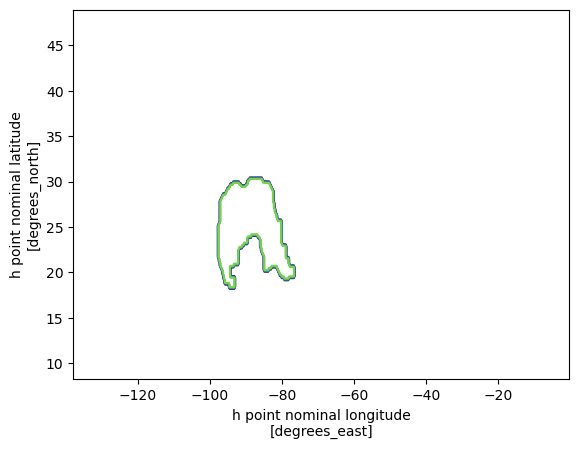

In [7]:
event = (labels==event_label).any("time")
event.plot.contour()

In [8]:
blob = labels.where(labels==event_label, drop=True)

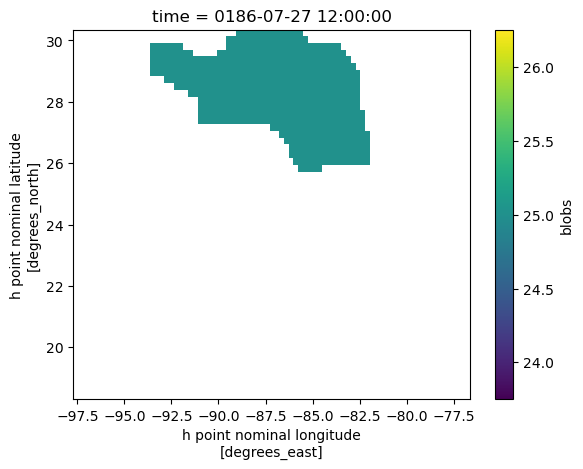

In [9]:
blob[1].plot()

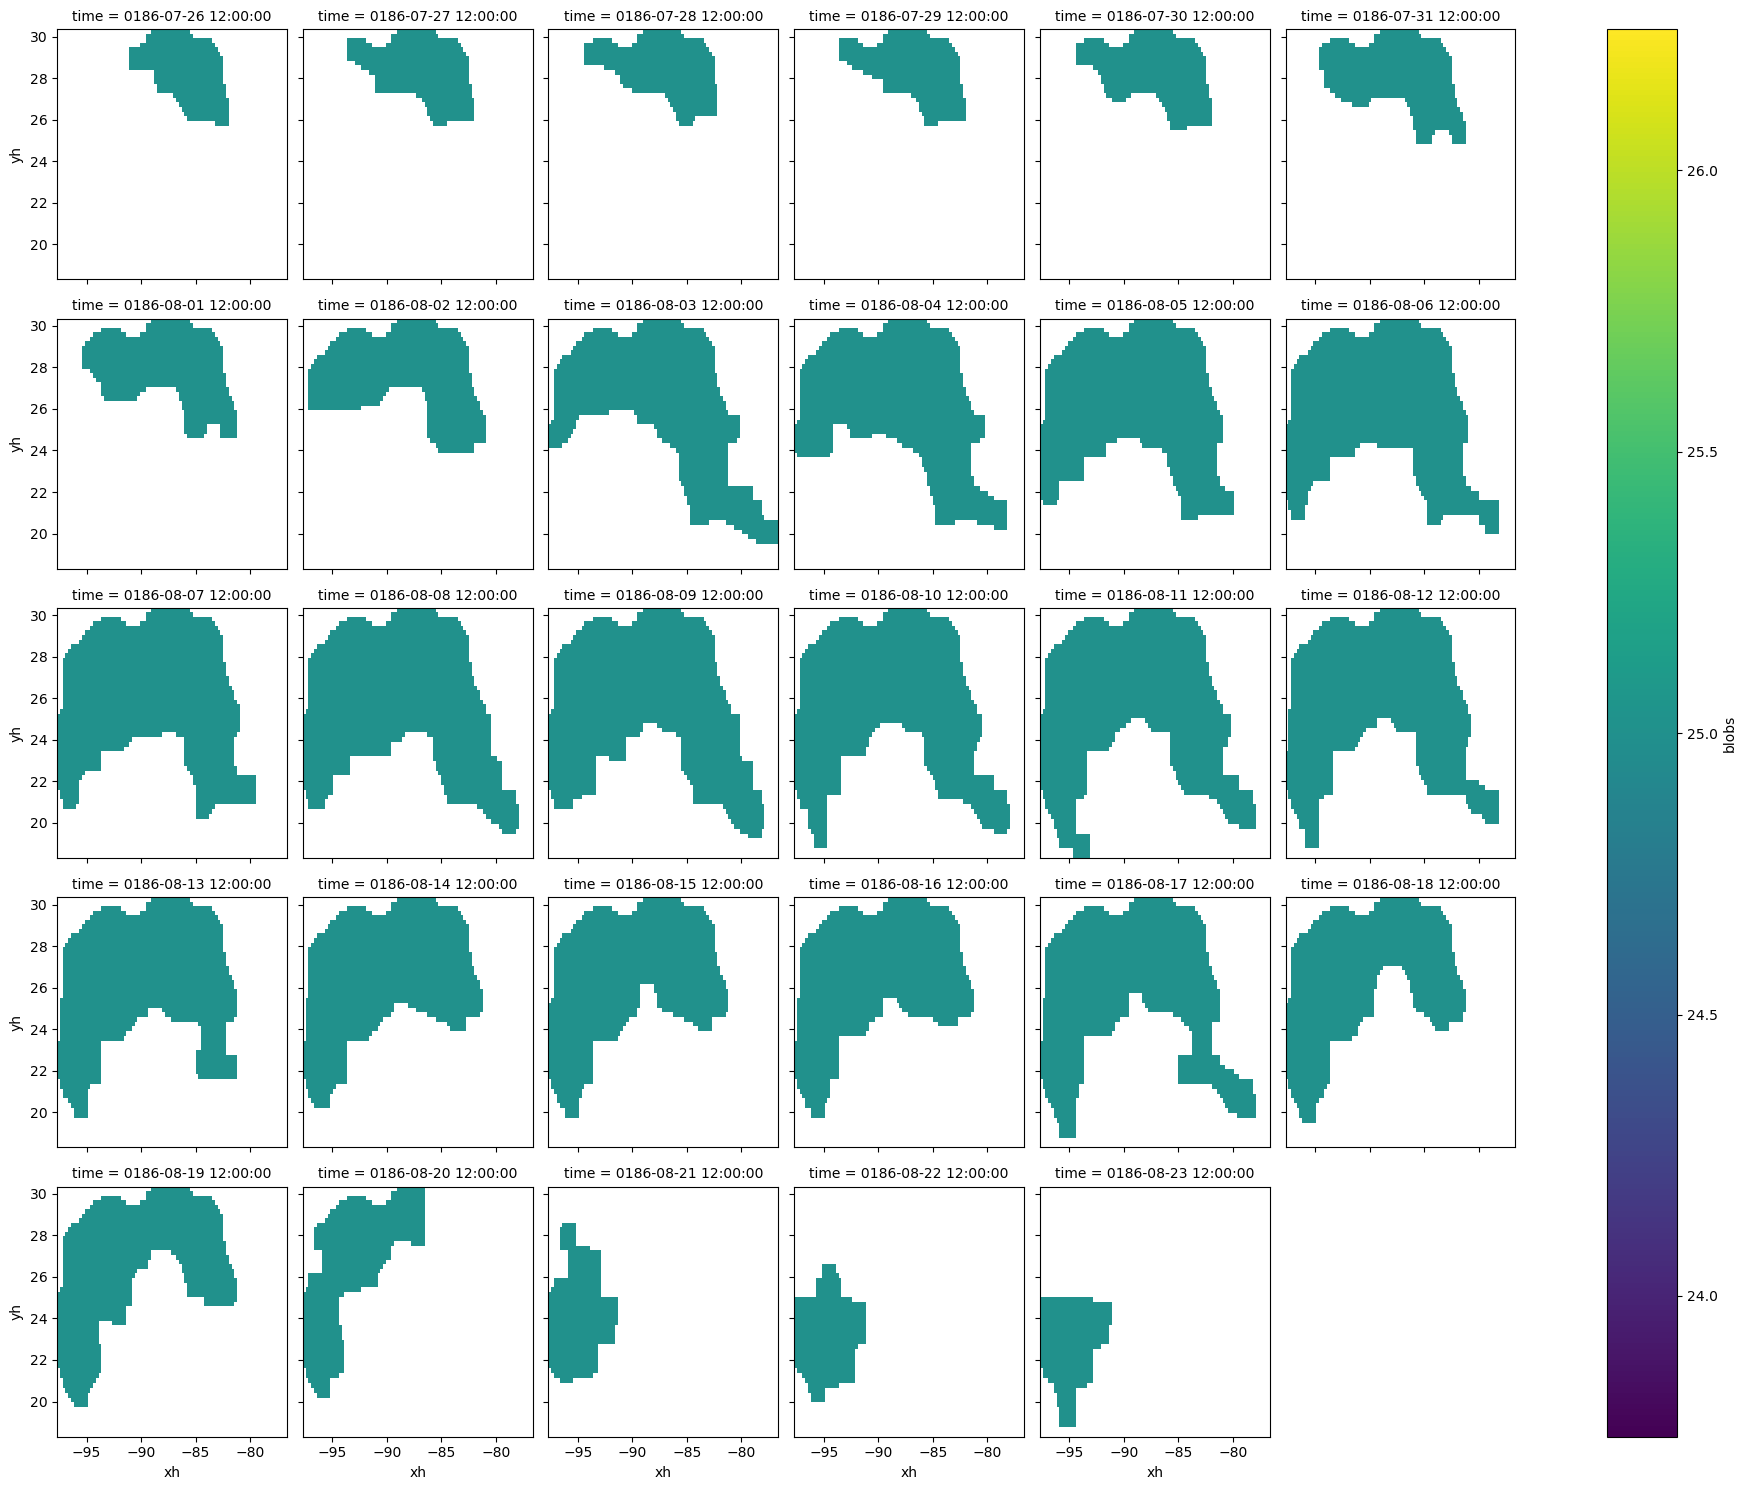

In [12]:
blob.plot(col="time", col_wrap=6)
#blob.plot(col="time", col_wrap=6)
#event.plot.contour()

plt.show()

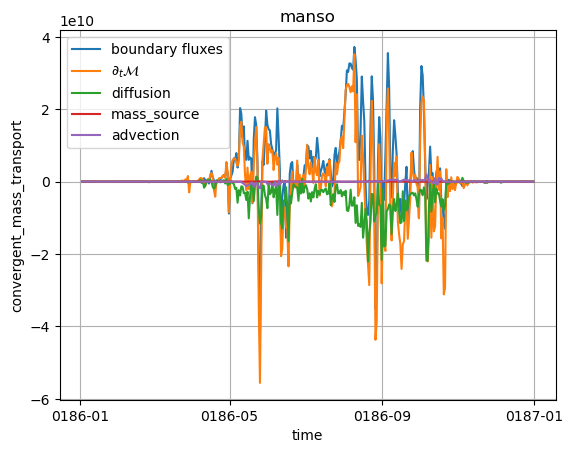

In [11]:
(-wmt.sel(thetao_l_target=29, method='nearest').sel(time=slice('0186','0186'))).boundary_fluxes.plot(label='boundary fluxes')
wmt.sel(thetao_l_target=29,method='nearest').sel(time=slice('0186','0186')).mass_tendency.plot(label=r"$\partial_{t} \mathcal{M}$")
(-wmt.sel(thetao_l_target=29,method='nearest').sel(time=slice('0186','0186')).diffusion).plot(label=r"diffusion")
#wmt.sel(thetao_l_target=29,method='nearest').sel(time=slice('0186','0186')).advection.plot(label=r"advection")
wmt.sel(thetao_l_target=29,method='nearest').sel(time=slice('0186','0186')).mass_source.plot(label=r"mass_source")
#wmt.sel(thetao_l_target=29,method='nearest').sel(time=slice('0186','0186')).Leibniz_material_derivative.plot(label='Leibniz_material_derivative')
wmt.sel(thetao_l_target=29,method='nearest').sel(time=slice('0186','0186')).convergent_mass_transport.plot(label='advection')

plt.legend()
plt.title('manso')
plt.grid(True)
plt.show()

In [12]:
wmt_mhw

<xarray.Dataset>
Dimensions:                                    (time: 36, thetao_l_target: 440,
                                                thetao_i_target: 441,
                                                time_bounds: 37, xh: 269,
                                                yh: 130)
Coordinates:
  * time                                       (time) object 0186-08-02 12:00...
  * thetao_i_target                            (thetao_i_target) float64 -4.0...
  * time_bounds                                (time_bounds) object 0186-08-0...
  * xh                                         (xh) float64 -137.9 ... -69.91
  * yh                                         (yh) float64 10.2 10.44 ... 39.07
    geolat                                     (yh, xh) float32 ...
    geolon                                     (yh, xh) float32 ...
    areacello                                  (yh, xh) float32 ...
    deptho                                     (yh, xh) float32 ...
    lon                                        (yh, xh) float32 ...
    lat                                        (yh, xh) float32 ...
  * thetao_l_target                            (thetao_l_target) float64 -4.0...
Data variables: (12/21)
    frazil_ice                                 (time, thetao_l_target) float64 ...
    Eulerian_tendency                          (time, thetao_l_target) float64 ...
    advection                                  (time, thetao_l_target) float64 ...
    surface_ocean_flux_advective_negative_lhs  (time, thetao_l_target) float64 ...
    surface_exchange_flux                      (time, thetao_l_target) float64 ...
    diffusion                                  (time, thetao_l_target) float64 ...
    ...                                         ...
    mass_tendency                              (time, thetao_l_target) float64 ...
    dt                                         (time) float64 ...
    Leibniz_material_derivative                (time, thetao_l_target) float64 ...
    spurious_numerical_mixing                  (time, thetao_l_target) float64 ...
    advection_plus_BC                          (time, thetao_l_target) float64 ...
    diabatic_advection                         (time, thetao_l_target) float64 ...

In [13]:
wmt_mhw.spurious_numerical_mixing

<xarray.DataArray 'spurious_numerical_mixing' (time: 42, thetao_l_target: 440)>
[18480 values with dtype=float64]
Coordinates:
  * time             (time) object 0186-07-21 12:00:00 ... 0186-08-31 12:00:00
  * thetao_l_target  (thetao_l_target) float64 -4.0 -3.9 -3.8 ... 39.7 39.8 39.9

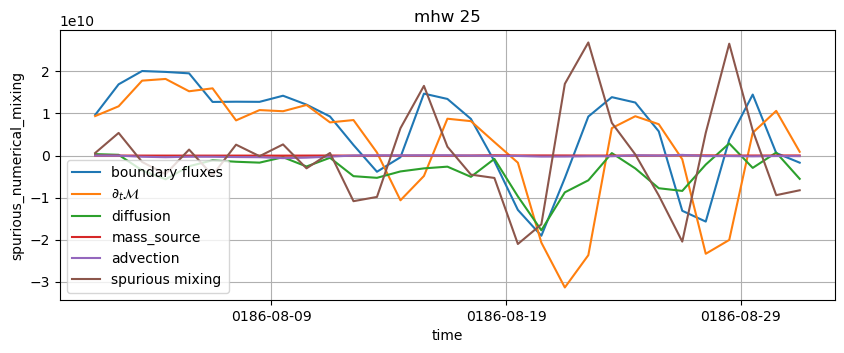

In [14]:
plt.figure(figsize=(10,3.5))
(-wmt_mhw.sel(thetao_l_target=29, method='nearest').sel(time=slice('0186-08-01','0186-09-08'))).boundary_fluxes.plot(label='boundary fluxes')
wmt_mhw.sel(thetao_l_target=29,method='nearest').sel(time=slice('0186-08-01','0186-09-08')).mass_tendency.plot(label=r"$\partial_{t} \mathcal{M}$")
(-wmt_mhw.sel(thetao_l_target=29,method='nearest').sel(time=slice('0186-08-01','0186-09-08'))).diffusion.plot(label=r"diffusion")
#wmt.sel(thetao_l_target=29,method='nearest').sel(time=slice('0186','0186')).advection.plot(label=r"advection")
wmt_mhw.sel(thetao_l_target=29,method='nearest').sel(time=slice('0186-08-01','0186-09-08')).mass_source.plot(label=r"mass_source")
#wmt.sel(thetao_l_target=29,method='nearest').sel(time=slice('0186','0186')).Leibniz_material_derivative.plot(label='Leibniz_material_derivative')
wmt_mhw.sel(thetao_l_target=29,method='nearest').sel(time=slice('0186-08-01','0186-09-08')).convergent_mass_transport.plot(label='advection')
wmt_mhw.sel(thetao_l_target=29,method='nearest').sel(time=slice('0186-08-01','0186-09-08')).spurious_numerical_mixing.plot(label='spurious mixing')

plt.legend()
plt.grid(True)
plt.title('mhw 25')

plt.show()

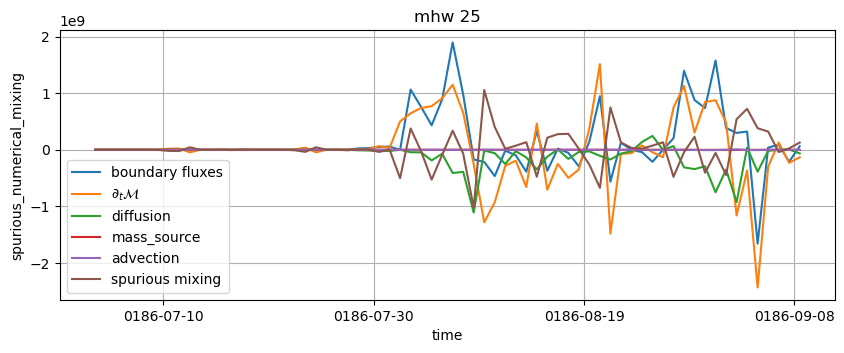

In [15]:
plt.figure(figsize=(10,3.5))
(-wmt.sel(thetao_l_target=32, method='nearest').sel(time=slice('0186-07-03','0186-09-08'))).boundary_fluxes.plot(label='boundary fluxes')
wmt.sel(thetao_l_target=32,method='nearest').sel(time=slice('0186-07-03','0186-09-08')).mass_tendency.plot(label=r"$\partial_{t} \mathcal{M}$")
(-wmt.sel(thetao_l_target=32,method='nearest').sel(time=slice('0186-07-03','0186-09-08'))).diffusion.plot(label=r"diffusion")
#wmt.sel(thetao_l_target=29,method='nearest').sel(time=slice('0186','0186')).advection.plot(label=r"advection")
wmt.sel(thetao_l_target=32,method='nearest').sel(time=slice('0186-07-03','0186-09-08')).mass_source.plot(label=r"mass_source")
#wmt.sel(thetao_l_target=29,method='nearest').sel(time=slice('0186','0186')).Leibniz_material_derivative.plot(label='Leibniz_material_derivative')
wmt.sel(thetao_l_target=32,method='nearest').sel(time=slice('0186-07-03','0186-09-08')).convergent_mass_transport.plot(label='advection')
wmt.sel(thetao_l_target=32,method='nearest').sel(time=slice('0186-07-03','0186-09-08')).spurious_numerical_mixing.plot(label='spurious mixing')

plt.legend()
plt.grid(True)
plt.title('mhw 25')

plt.show()

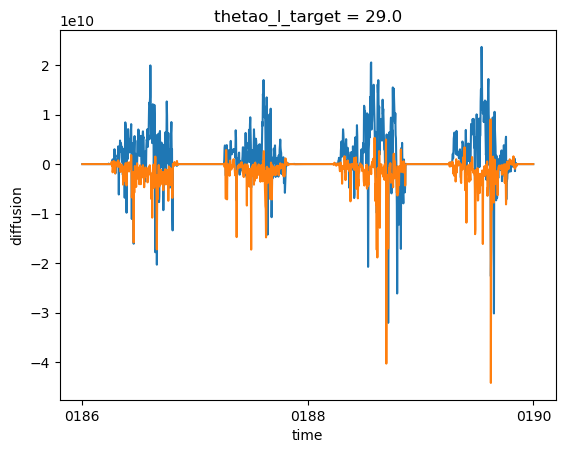

In [14]:
(-wmt_mhw.sel(thetao_l_target=29, method='nearest').boundary_fluxes).plot(label='boundary fluxes')
(-wmt_mhw.sel(thetao_l_target=29,method='nearest')).diffusion.plot()

In [15]:
wmt

<xarray.Dataset>
Dimensions:                                    (time: 1459,
                                                thetao_i_target: 441,
                                                time_bounds: 1459, xh: 269,
                                                yh: 130, thetao_l_target: 440)
Coordinates:
  * time                                       (time) object 0186-01-02 12:00...
  * thetao_i_target                            (thetao_i_target) float64 -4.0...
  * time_bounds                                (time_bounds) object 0186-01-0...
  * xh                                         (xh) float64 -137.9 ... -69.91
  * yh                                         (yh) float64 10.2 10.44 ... 39.07
  * thetao_l_target                            (thetao_l_target) float64 -4.0...
    geolat                                     (yh, xh) float32 ...
    geolon                                     (yh, xh) float32 ...
    areacello                                  (yh, xh) float32 ...
    deptho                                     (yh, xh) float32 ...
    lon                                        (yh, xh) float32 ...
    lat                                        (yh, xh) float32 ...
Data variables: (12/21)
    Eulerian_tendency                          (time, thetao_l_target) float64 ...
    bottom_flux                                (time, thetao_l_target) float64 ...
    frazil_ice                                 (time, thetao_l_target) float64 ...
    surface_ocean_flux_advective_negative_lhs  (time, thetao_l_target) float64 ...
    surface_ocean_flux_advective_negative_rhs  (time, thetao_l_target) float64 ...
    surface_exchange_flux                      (time, thetao_l_target) float64 ...
    ...                                         ...
    mass_tendency                              (time, thetao_l_target) float64 ...
    dt                                         (time) float64 ...
    Leibniz_material_derivative                (time, thetao_l_target) float64 ...
    spurious_numerical_mixing                  (time, thetao_l_target) float64 ...
    advection_plus_BC                          (time, thetao_l_target) float64 ...
    diabatic_advection                         (time, thetao_l_target) float64 ...

[]

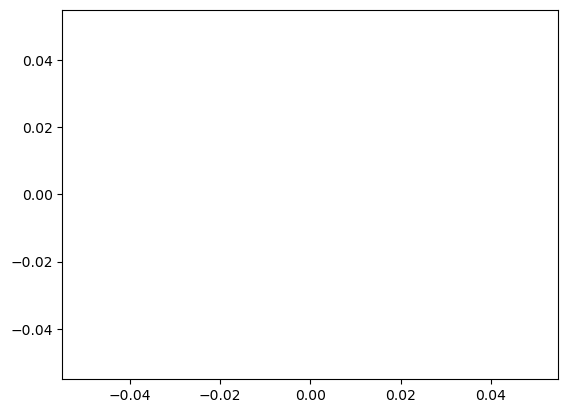

In [182]:
plt.plot(vmin=-5e10)

In [183]:
(wmt.boundary_fluxes+wmt.diffusion+wmt.mass_tendency).sel(thetao_l_target=29, method='nearest').sel(time=slice('0186','0186'))

<xarray.DataArray (time: 364)>
array([ 3.56994834e+06, -3.28596077e+07,  3.47374574e+06,  4.42646330e+06,
       -4.24885270e+06, -5.09810778e+06, -5.58582229e+06, -4.40025795e+06,
       -3.58830237e+06, -9.52458754e+06,  1.57018966e+07, -9.40604365e+06,
       -2.50349620e+07, -1.96819551e+07, -1.34517033e+07,  1.33110898e+06,
        1.66492994e+06,  3.32947153e+06, -2.77290171e+07, -1.04384284e+06,
       -1.09510656e+06, -5.29337913e+06, -9.06077677e+06, -4.81804158e+06,
        1.56096502e+06, -7.41297114e+06, -5.01181705e+06,  3.65635629e+07,
       -6.72654222e+05, -2.52249278e+06, -5.68248092e+06, -3.94466039e+06,
       -1.04396086e+07,  7.15740501e+06,  1.92243424e+07,  1.46712954e+07,
        9.92636169e+06,  9.85075257e+06,  8.82953178e+06,  2.19902407e+06,
       -4.73275506e+06, -1.39851761e+07, -5.43146591e+06, -2.05736922e+06,
       -5.68238383e+06,  1.99633334e+07,  4.13310066e+06, -1.16106976e+07,
       -3.00449653e+07, -9.70310239e+06, -1.17015013e+07, -9.41388231e+06,
       -4.06311064e+06,  7.01009770e+06,  1.10747452e+08, -8.25737823e+06,
       -1.29966383e+07, -1.02906569e+07, -1.60223930e+07,  2.46123364e+07,
       -2.82836471e+07, -3.58937872e+06, -3.80484456e+06,  6.15272054e+07,
       -6.15272054e+07,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  3.21082368e+06,  1.71371870e+08, -1.09503969e+08,
...
       -3.49592360e+09, -9.81354562e+08,  6.17573926e+09,  2.45724329e+09,
        4.44532888e+09, -3.56532825e+09,  6.18908239e+08, -1.17375959e+10,
       -9.68698299e+09,  3.55941459e+09, -3.35821088e+09, -6.12757587e+08,
       -2.38164432e+09,  1.75254576e+09, -1.76239658e+09, -2.25968623e+07,
       -1.69827051e+09,  1.19274820e+08,  1.08519604e+09,  6.04120141e+08,
       -7.10510267e+08,  3.24769216e+08,  7.85243905e+07, -1.79489656e+09,
       -9.07873837e+08,  3.64468856e+08, -9.14654882e+08,  3.92832356e+07,
       -8.80715243e+07,  2.26128751e+08, -1.69765506e+08, -1.37645829e+08,
       -1.98210005e+07, -9.43120746e+07, -1.60109404e+08,  4.45342097e+07,
        1.83087755e+06,  1.99221520e+07, -2.53200031e+07,  3.42389496e+06,
        1.07809744e+08, -1.36329928e+08,  2.11962280e+07, -5.80785570e+07,
        4.53455738e+07,  4.48443141e+06, -2.05740320e+07, -3.11241629e+07,
        5.27737745e+06, -5.58370688e+07, -3.91920572e+07, -2.32117589e+07,
       -1.49773547e+07,  2.31215412e+08,  4.75157182e+07, -2.64259842e+07,
       -9.86253691e+06, -1.40587584e+07, -1.00018495e+07, -6.17986276e+06,
       -5.42431763e+06, -4.78093615e+06, -7.18084020e+06,  3.29316681e+07,
       -2.91648550e+06, -8.63970797e+05, -6.08204421e+06, -5.17915231e+06,
        1.08288053e+07, -1.44640379e+05, -2.33882963e+07,  3.92313060e+06,
       -2.78127757e+07,  9.65643833e+06,  3.81235887e+07, -7.77778935e+06,
       -1.25554476e+07, -1.15734270e+07, -9.41906451e+06, -4.40630168e+06])
Coordinates:
  * time             (time) object 0186-01-02 12:00:00 ... 0186-12-31 12:00:00
    thetao_l_target  float64 29.0

In [ ]:
(wmt.boundary_fluxes+wmt.diffusion+wmt.mass_tendency).sel(thetao_l_target=29, method='nearest').sel(time=slice('0186','0186')).plot(vmin=-5e+07, vmax=-5e+07)


In [ ]:
(wmt.boundary_fluxes+wmt.diffusion+wmt.mass_tendency).sel(thetao_l_target=29, method='nearest').sel(time=slice('0186','0186')).plot(vmin=-5e+07, vmax=-5e+07)
(-wmt.spurious_numerical_mixing.sel(thetao_l_target=29, method='nearest').sel(time=slice('0186','0186'))).plot()
wmt.diffusion.sel(thetao_l_target=29, method='nearest').sel(time=slice('0186','0186')).plot()

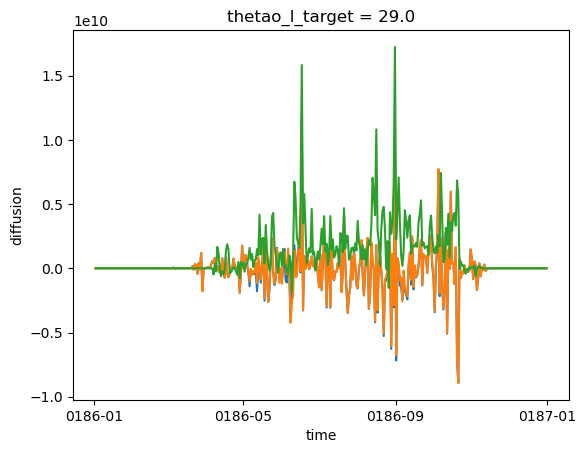

In [17]:
(wmt_mhw.boundary_fluxes+wmt_mhw.diffusion+wmt_mhw.mass_tendency).sel(thetao_l_target=29, method='nearest').sel(time=slice('0186','0186')).plot()
(-wmt_mhw.spurious_numerical_mixing.sel(thetao_l_target=29, method='nearest').sel(time=slice('0186','0186'))).plot()
wmt_mhw.diffusion.sel(thetao_l_target=29, method='nearest').sel(time=slice('0186','0186')).plot()

In [177]:
def plot_wmt(wmt, thetao, time_slice=None, label='manso', figsize=(10, 3)):
    """
    Plotting calculated wmt for a given region

    Parameters:
    - wmt
    - thetao: target temperature
    - time_slice: Optional. Write as ('start_date', 'end_date').
      If None, the entire time range will be plotted.
    - label (str): Optional. The label for the plot.

    Returns:
    None
    """
    wmt_sel = wmt.sel(thetao_l_target=thetao, method='nearest')
    
    if time_slice:
        wmt_sel = wmt_sel.sel(time=slice(time_slice[0], time_slice[1]))

    plt.figure(figsize=figsize)  
    
    (-wmt_sel.boundary_fluxes).plot(label='boundary fluxes', vmin=-5e10, vmax=5e10)
    wmt_sel.mass_tendency.plot(label=r"$\partial_{t} \mathcal{M}$",vmin=-5e10, vmax=5e10)
    (-wmt_sel.diffusion).plot(label=r"diffusion",vmin=-5e10, vmax=5e10)
    wmt_sel.mass_source.plot(label=r"mass_source",vmin=-5e10, vmax=5e10)
    wmt_sel.convergent_mass_transport.plot(label='advection',vmin=-5e10, vmax=5e10)
    (-wmt_sel.spurious_numerical_mixing).plot(label='spurious mixing',vmin=-5e10, vmax=5e10)

    plt.legend()
    plt.title(label)
    plt.grid(True,linewidth=0.2)
    plt.show()

In [42]:
wmt_mhw.time 

<xarray.DataArray 'time' (time: 1459)>
array([cftime.DatetimeNoLeap(186, 1, 2, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(186, 1, 3, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(186, 1, 4, 12, 0, 0, 0, has_year_zero=True), ...,
       cftime.DatetimeNoLeap(189, 12, 29, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(189, 12, 30, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(189, 12, 31, 12, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 0186-01-02 12:00:00 ... 0189-12-31 12:00:00

In [17]:
import cftime

In [18]:
tmp = df.loc[df.id==event_label].date.values[0][0]

In [ ]:
cftime.DatetimeNoLeap(
    df.loc[df.id==event_label].date.values[0][0].year,
    df.loc[df.id==event_label].date.values[0][0].month,
    df.loc[df.id==event_label].date.values[0][0].day
)

In [20]:
df.loc[df.id==event_label].date.values[0][0]

numpy.datetime64('0186-07-26')

In [21]:
clim = wmt.mass_tendency.sel(thetao_l_target=29, method="nearest").groupby("time.dayofyear").mean("time")

In [22]:
clim.dayofyear[2:]

<xarray.DataArray 'dayofyear' (dayofyear: 363)>
array([  3,   4,   5, ..., 363, 364, 365])
Coordinates:
    thetao_l_target  float64 29.0
  * dayofyear        (dayofyear) int64 3 4 5 6 7 8 9 ... 360 361 362 363 364 365

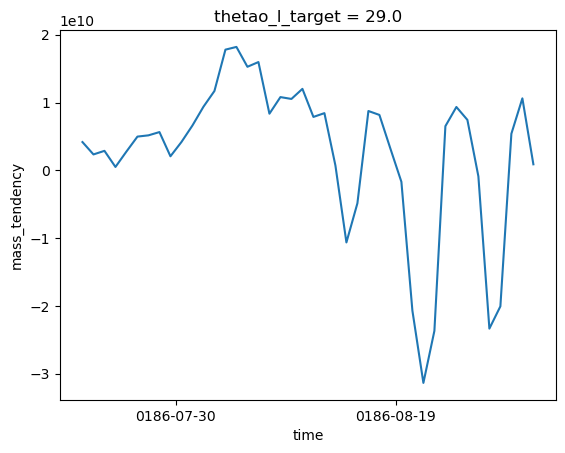

In [23]:
wmt_mhw.sel(thetao_l_target=29, method="nearest").mass_tendency.plot()

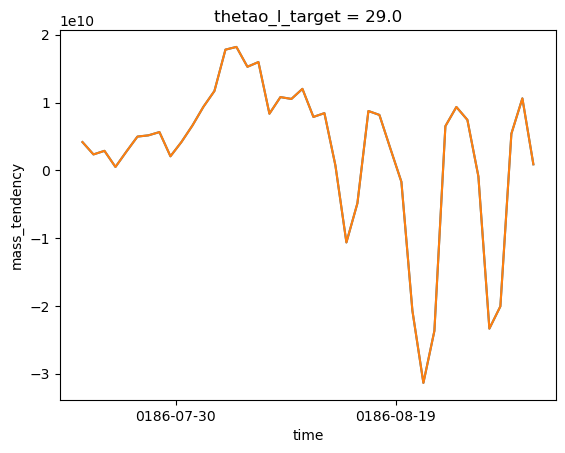

In [24]:
wmt_mhw.sel(thetao_l_target=29, method="nearest").mass_tendency.sel(time=slice('0186-07','0186-09')).plot()
wmt_mhw.sel(thetao_l_target=29, method="nearest").mass_tendency.where(
    (wmt_mhw.time > cftime.datetime(186, 7, 1, calendar="noleap")) &
    (wmt_mhw.time < cftime.datetime(186, 10, 1, calendar="noleap")), 0
).plot()

In [125]:
#wmt.time.values[0] + np.array([datetime.timedelta(days=int(d.values-3)) for d in clim.dayofyear[2:]])

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import cftime


def plot_wmt_max(wmt, thetao, time_slice=None, label='manso', figsize=(10, 3), vmin=None, vmax=None, xlim=None, ylim=None):
    """
    Plotting calculated wmt for a given region

    Parameters:
    - wmt
    - thetao: target temperature
    - time_slice: Optional. Write as ('start_date', 'end_date').
      If None, the entire time range will be plotted.
    - label (str): Optional. The label for the plot.
    - figsize (tuple): Optional. Size of the figure (width, height).
    - vmin (float): Optional. Minimum value for color scale.
    - vmax (float): Optional. Maximum value for color scale.

    Returns:
    None
    """
    wmt_sel = wmt.sel(thetao_l_target=thetao, method='nearest')
    
    if time_slice:
        wmt_sel = wmt_sel.sel(time=slice(time_slice[0], time_slice[1]))

    plt.figure(figsize=figsize)  
    
    (-wmt_sel.boundary_fluxes).plot(label='boundary fluxes')
    wmt_sel.mass_tendency.plot(label=r"$\partial_{t} \mathcal{M}$")
    (-wmt_sel.diffusion).plot(label=r"diffusion")
    wmt_sel.mass_source.plot(label=r"mass_source")
    wmt_sel.convergent_mass_transport.plot(label='advection')
    (-wmt_sel.spurious_numerical_mixing).plot(label='spurious mixing')

    plt.legend()
    plt.title(label)
    plt.grid(True, linewidth=0.2)
    
    if vmin is not None and vmax is not None:
        plt.ylim(vmin, vmax)
        
    plt.show()
    plt.show()


In [ ]:
plot_wmt_max

In [195]:
np.max(wmt_mhw.boundary_fluxes)
np.min(wmt_mhw.mass_tendency)

<xarray.DataArray 'mass_tendency' ()>
array(-5.15500964e+10)

In [36]:
wmt_mhw.time

<xarray.DataArray 'time' (time: 42)>
array([cftime.DatetimeNoLeap(186, 7, 21, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(186, 7, 22, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(186, 7, 23, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(186, 7, 24, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(186, 7, 25, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(186, 7, 26, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(186, 7, 27, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(186, 7, 28, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(186, 7, 29, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(186, 7, 30, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(186, 7, 31, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(186, 8, 1, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(186, 8, 2, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(186, 8, 3, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(186, 8, 4, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(186, 8, 5, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(186, 8, 6, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(186, 8, 7, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(186, 8, 8, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(186, 8, 9, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(186, 8, 10, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(186, 8, 11, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(186, 8, 12, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(186, 8, 13, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(186, 8, 14, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(186, 8, 15, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(186, 8, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(186, 8, 17, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(186, 8, 18, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(186, 8, 19, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(186, 8, 20, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(186, 8, 21, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(186, 8, 22, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(186, 8, 23, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(186, 8, 24, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(186, 8, 25, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(186, 8, 26, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(186, 8, 27, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(186, 8, 28, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(186, 8, 29, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(186, 8, 30, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(186, 8, 31, 12, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 0186-07-21 12:00:00 ... 0186-08-31 12:00:00

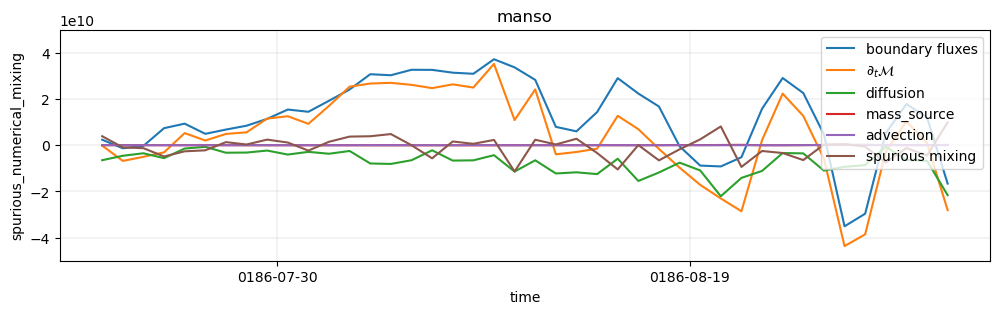

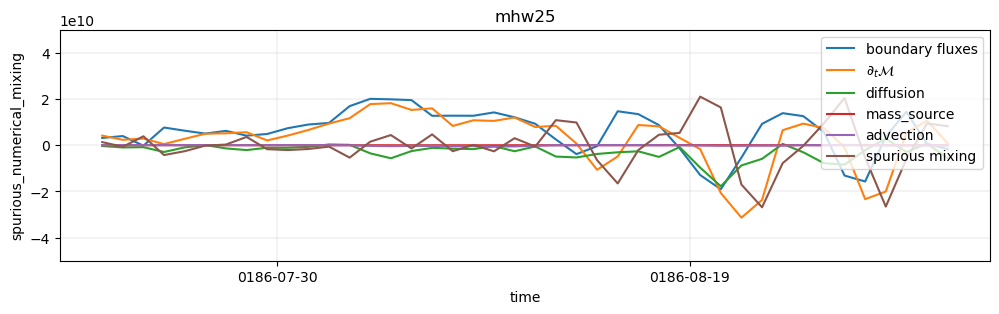

In [43]:
plot_wmt_max(wmt, thetao=29, label='manso',time_slice=('0186-07-21','0186-08-31'),figsize=(12, 3),vmin=-5e+10, vmax=5e+10)
plot_wmt_max(wmt_mhw, thetao=29, label='mhw25',time_slice=('0186-07-21','0186-08-31'),figsize=(12, 3),vmin=-5e+10, vmax=5e+10)

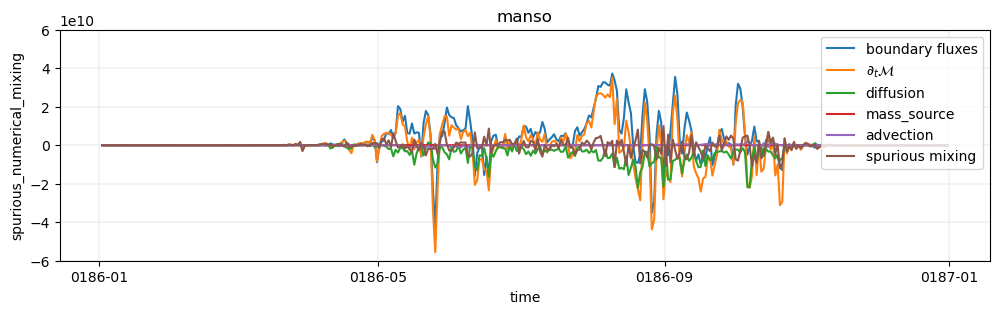

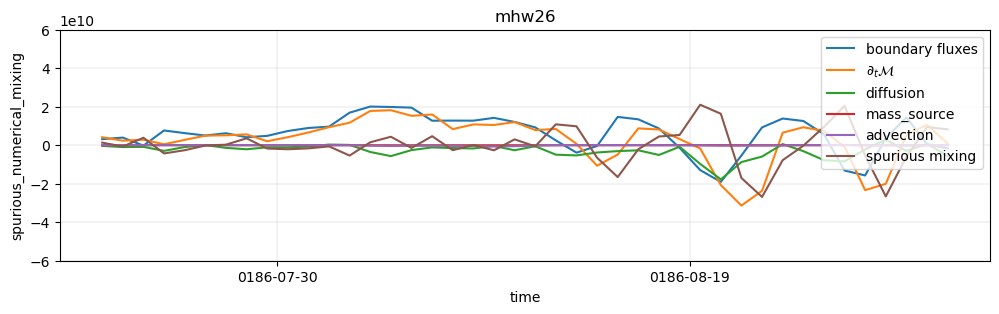

In [44]:
plot_wmt_max(wmt, thetao=29, label='manso',time_slice=('0186','0186'),figsize=(12, 3),vmin=-6e+10, vmax=6e+10)
plot_wmt_max(wmt_mhw, thetao=29, label='mhw26',time_slice=('0186','0186'),figsize=(12, 3),vmin=-6e+10, vmax=6e+10)